BL3LeftThird
============

This was a model including the 4-jaw slit, collimators c1 and C2 and then detectors at the 8m position of the neutron detector. For this model, the y jaws of the slit were set fully open but the x jaws were set at -3 cm and -1 cm leaving a 2 cm openning. Because of the focussing effect of the collimator system, the resulting beam spot is displaced to the positive x side.

At the detector position are a position sensitive detector (psd), a full-coverage wavelength monitor (LMon), and a grid of 9 wavelength monitors with the central row and column being 1 cm wide/tall and the outer blocks 5 cm wide to ensure that they catch all the neutrons in their segment of the detector space.

We start by loading tools and reading in the output of the position sensitive detector.

In [14]:
import sys
sys.path.insert(0, '/Users/bcollett/Research/BL3/NeutronSpectrum/mcstas_local/pytools')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from nspectrum import NSpectrum
from psd import PSDData

Load psd file BL3LeftThird/Blackbox.psd
Read 336 lines from BL3LeftThird/Blackbox.psd
Line 30 # Data [psd_monitor/Blackbox.psd] I:

Intensity block starts at line 31
Line 31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Found 101 columns.
End of first block.
Line 131 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Line 132 # Errors [psd_monitor/Blackbox.psd] I_err:

error block starts at line 31
Found 101 rows.
<class 'numpy.ndarray'>
(2, 2)


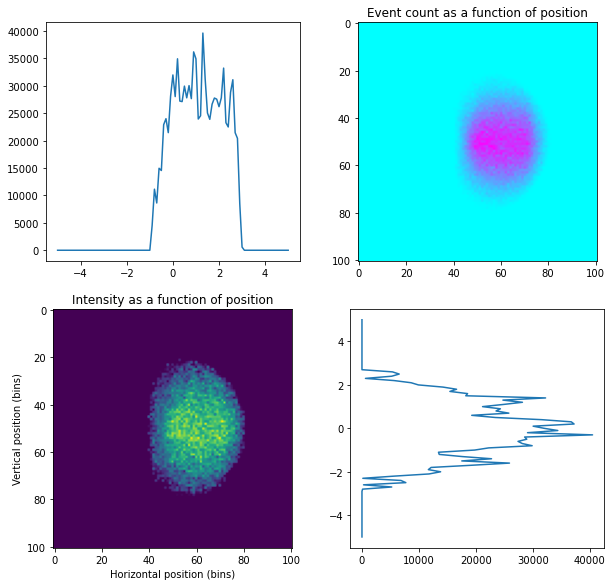

In [16]:
im1 = PSDData('BL3LeftThird/Blackbox.psd')
im1.plot()

We see that the counts are displaced significantly to the right (high x) side, as expected.

Next let's look at the overall spectrum.

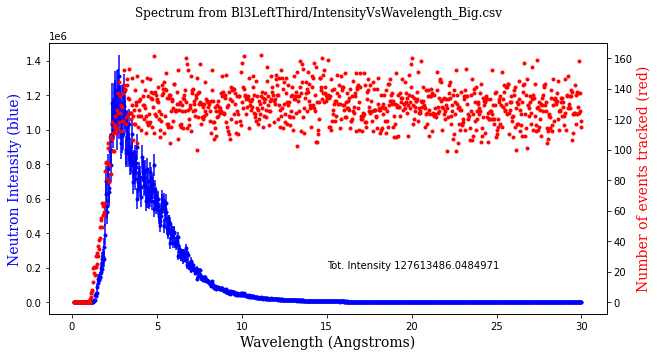

In [17]:
full = NSpectrum('Bl3LeftThird/IntensityVsWavelength_Big.csv')
full.plot()

In [18]:
fullC1, fullEC = full.C1()
print(f'Full C1 = {fullC1}+-{fullEC} s')

Full C1 = 5.0472531867370405+-0.0003774089142372547 s


That is a little higher than the C1 for the full beam.

Now we have to read in the 9 individual monitors.

In [19]:
mon = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for i in range(3):
    for j in range(3):
        print(f'Load LMon{i}{j}csv.dat')
        mon[i][j] = NSpectrum(f'Bl3LeftThird/LMon{i}{j}csv.dat')

Load LMon00csv.dat
Load LMon01csv.dat
Load LMon02csv.dat
Load LMon10csv.dat
Load LMon11csv.dat
Load LMon12csv.dat
Load LMon20csv.dat
Load LMon21csv.dat
Load LMon22csv.dat


Now we would like to see what they look like.

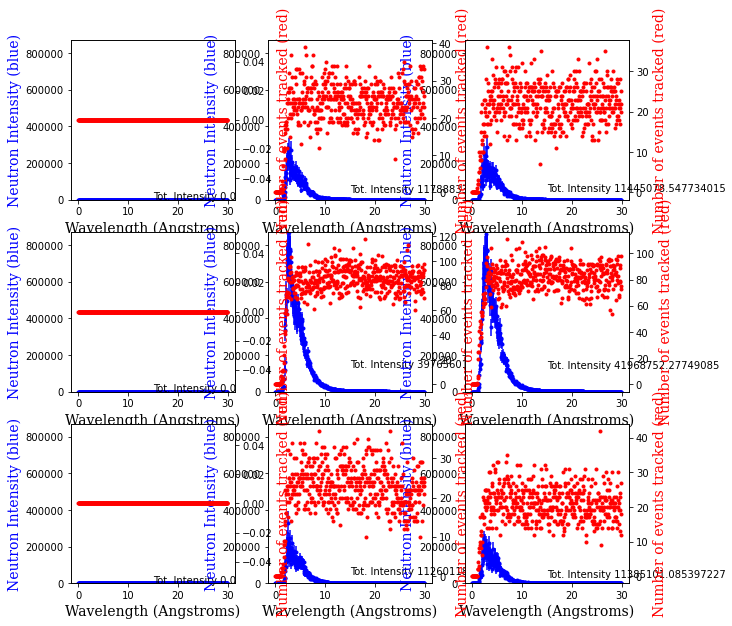

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
max = mon[1][1].max_inten
for i in range(3):
    for j in range(3):
        mon[i][j].plotOn(axes[i][j])
        axes[i][j].set_ylim(bottom=0.0, top=max)
# plt.tight_layout()

Well, it is a trifle messy (overly large font size for labels in part) but it gets the point across. We see that there are no counts in the left 1/3 of the detection area and that the central 1/3 is about 4x as strong as the upper and lower 2/3 (remember that the central 1/3 either way is 2 cm tall but the outer thirds are 5 cm tall or wide). The central row has about 90 neutron rays/channel while the outer rows have only about 20 rays/channel, right in line with the difference in intensity. Even the lowest intensity is about 11 million and thus quite reliable for the purpose of calculating C1.

So what do the C1s look like?

In [21]:
c = np.zeros((3, 3))
e = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        c[i][j], e[i][j] = mon[i][j].C1()
    print(f'{c[i][0]:.4f}+/-{e[i][0]:.4f}     {c[i][1]:.4f}+/-{e[i][1]:.4f}     {c[i][2]:.4f}+/-{e[i][2]:.4f} s')

/Users/bcollett/Research/BL3/NeutronSpectrum/mcstas_local/pytools/spectralcorrection.py:66: RuntimeWarning: invalid value encountered in double_scalars
  C1 = num / denom


nan+/-nan     5.0935+/-0.0012     5.0197+/-0.0012 s
nan+/-nan     5.1116+/-0.0007     4.9809+/-0.0007 s
nan+/-nan     5.1206+/-0.0013     4.9642+/-0.0011 s


So the differences are very real, many times the uncertainty. What if we re-do them as differences from the overall value?

In [22]:
for i in range(3):
    print(f'{c[i][0]-fullC1:.4f}+/-{e[i][0]:.4f}     {c[i][1]-fullC1:.4f}+/-{e[i][1]:.4f}     {c[i][2]-fullC1:.4f}+/-{e[i][2]:.4f} s')

nan+/-nan     0.0463+/-0.0012     -0.0276+/-0.0012 s
nan+/-nan     0.0643+/-0.0007     -0.0664+/-0.0007 s
nan+/-nan     0.0734+/-0.0013     -0.0831+/-0.0011 s


So, while all the differences are less than 1 second, they are not much less.

We can do them in horizontal stripes too.

In [23]:
tl = NSpectrum(clone=mon[0][0])
tm = NSpectrum(clone=mon[0][1])
tr = NSpectrum(clone=mon[0][2])
top = tl.plus(tm.plus(tr))

itot=23233912.336933408 imax=520594.06649999996
ctot=21969.0 imax=70.0
itot=23233912.336933408 imax=520594.06649999996
ctot=21969.0 imax=70.0


In [25]:
tlc, tle = tl.C1()
print(f'{tlc:.4f}+/-{tle:.4f}')
tmc, tme = tm.C1()
print(f'{tmc:.4f}+/-{tme:.4f}')
trc, tre = tr.C1()
print(f'{trc:.4f}+/-{tre:.4f}')
tc, te = top.C1()
print(f'{tc:.4f}+/-{te:.4f}')
print(f'Raw C1 = {top._corr.CorrBC(top.data[:, 0], top.data[:, 1])}')

nan+/-nan
5.0935+/-0.0012
5.0197+/-0.0014
5.0577+/-0.0009
Raw C1 = 5.057551657967989


In [29]:
ml = NSpectrum(clone=mon[1][0])
mm = NSpectrum(clone=mon[1][1])
mr = NSpectrum(clone=mon[1][2])
mmid = ml.plus(mm.plus(mr))
print(f'Raw C1 = {mmid._corr.CorrBC(mmid.data[:, 0], mmid.data[:, 1])}')
mlc, mle = ml.C1()
print(f'{mlc:.4f}+/-{mle:.4f}')
mmc, mme = mm.C1()
print(f'{mmc:.4f}+/-{mme:.4f}')
mrc, mre = mr.C1()
print(f'{mrc:.4f}+/-{mre:.4f}')
mc, me = mmid.C1()
print(f'{mc:.4f}+/-{me:.4f}')

itot=81734353.67938031 imax=1640222.3133999999
ctot=78883.0 imax=208.0
itot=81734353.67938031 imax=1640222.3133999999
ctot=78883.0 imax=208.0
Raw C1 = 5.045584689222892
nan+/-nan
5.1115+/-0.0007
4.9808+/-0.0007
5.0456+/-0.0005


In [30]:
bl = NSpectrum(clone=mon[2][0])
bm = NSpectrum(clone=mon[2][1])
br = NSpectrum(clone=mon[2][2])
bot = bl.plus(bm.plus(br))
print(f'Raw C1 = {bot._corr.CorrBC(bot.data[:, 0], bot.data[:, 1])}')
bc, be = bot.C1()
print(f'{bc:.4f}+/-{be:.4f}')

itot=22645220.030262727 imax=520827.3091
ctot=20788.0 imax=66.0
itot=22645220.030262727 imax=520827.3091
ctot=20788.0 imax=66.0
Raw C1 = 5.043385922495888
5.0434+/-0.0009


So we have small differences between the three values suggesting that we can count only the central 2 cm without serious effect on the C1 value.